In [36]:
import numpy as np
import numpy as np
from qiskit import *
from qiskit.visualization import *
from math import *
%matplotlib inline

# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)
circuitu = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits

circuit.measure([0,1], [0,1])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw()


Total count for 00 and 11 are: {'00': 503, '11': 497}


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

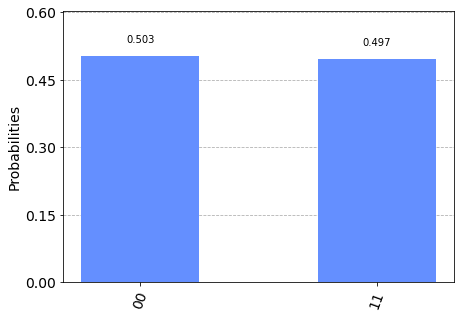

In [37]:
# Plot a histogram
plot_histogram(counts)


Total count for 00 and 11 are: {'11': 1}
[0.+0.j 0.+0.j 0.+0.j 1.+0.j]


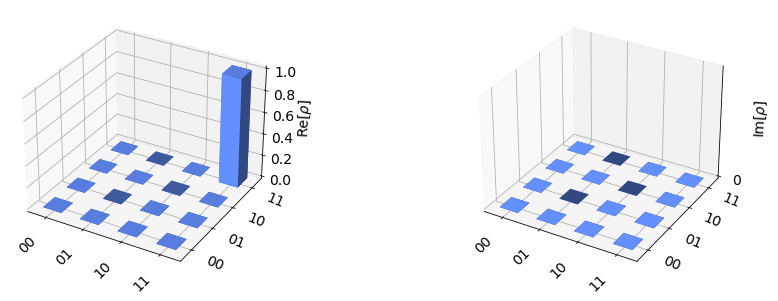

In [38]:
backend = Aer.get_backend('statevector_simulator')
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

outputstate = result.get_statevector(circuit, decimals=3)
print(outputstate)
plot_state_city(outputstate)

In [40]:
# Run the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')
job= execute(circuit, backend)
result = job.result()

# Show the results
#job.result().get_unitary(circuit, decimals=3) # hm gibts die Funktion nicht mehr

In [41]:
# Create a Quantum Circuit
meas = QuantumCircuit(2, 2)
meas.barrier(range(2))
# map the quantum measurement to the classical bits
meas.measure(range(2), range(2))

# The Qiskit circuit object supports composition using
# the addition operator.
qc = circuit + meas

#drawing the circuit
qc.draw()

┌───┐     ┌─┐    ░ ┌─┐   
q_0: ┤ H ├──■──┤M├────░─┤M├───
     └───┘┌─┴─┐└╥┘┌─┐ ░ └╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├─░──╫─┤M├
          └───┘ ║ └╥┘ ░  ║ └╥┘
c: 2/═══════════╩══╩═════╩══╩═
                0  1     0  1

In [42]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [44]:
counts = result_sim.get_counts(qc)
print(counts)

{'00': 520, '11': 504}


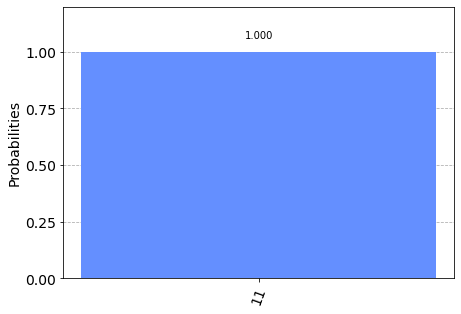

In [43]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [45]:
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.u3(pi/2,pi/2,pi/2,q)
qc.draw()

┌─────────────────┐
q60_0: ┤ U3(π/2,π/2,π/2) ├
       └─────────────────┘

In [46]:
job = execute(qc, backend)
execute(qc, backend).result().get_unitary(qc, decimals=3)

array([[ 7.07106781e-01+0.00000000e+00j, -4.32978028e-17-7.07106781e-01j],
       [ 4.32978028e-17+7.07106781e-01j, -7.07106781e-01+8.65956056e-17j]])